# Papadiamantis Texts

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(context='notebook', style='ticks')

import sys
import os

module_path = os.path.abspath('/content/drive/MyDrive/Papadiamantis/code')
if module_path not in sys.path:
    sys.path.append(module_path)

from loading_documents import directory_to_documents, num_tokens_from_string

## Text statistics

In [3]:
directory_path = "/content/drive/MyDrive/Papadiamantis/data"
documents = directory_to_documents(directory_path, split_chapters=False)
documents.keys()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00,  3.19it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00,  2.81it/s]
0it [00:00, ?it/s]
100%|██████████| 16/16 [00:04<00:00,  3.32it/s]


dict_keys(['Άρθρα', 'Διηγήματα', 'Μυθιστορήματα', 'Ποιήματα'])

In [4]:
texts_df = pd.DataFrame()
for key in documents.keys():
    df = pd.DataFrame([doc.metadata for doc in documents[key]])
    df['Κείμενο'] = [doc.page_content for doc in documents[key]]
    df['tokens'] = df['Κείμενο'].map(num_tokens_from_string)
    df['characters'] = df['Κείμενο'].map(len)
    texts_df = pd.concat([texts_df, df])

texts_df.info()
texts_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 20
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        256 non-null    object
 1   theme       256 non-null    object
 2   title       256 non-null    object
 3   year        256 non-null    int64 
 4   Κείμενο     256 non-null    object
 5   tokens      256 non-null    int64 
 6   characters  256 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.0+ KB


,type,theme,title,year,Κείμενο,tokens,characters
0,Άρθρα,Διορθωτικά,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ,0,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ\nΠαπαγεωργίου\nΣοὶ τόνδ...,421,345
1,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,"ΟΛΙΓΑΙ ΣΗΜΕΙΩΣΕΙΣ ΕΙΣ ΤΟ ΤΡΙῼΔΙΟΝ\nἘν πρώτοις,...",3843,3434
2,Άρθρα,Διορθωτικά,ΕΚΚΛΗΣΙΑΣΤΙΚΑΙ ΕΚΔΟΣΕΙΣ ΕΝ ΑΘΗΝΑΙΣ,0,Α´ Ὁ Διδάσκαλος καὶ τὸ «δηλαδὴ»\nἘδημοσιεύθη π...,24908,22167
3,Άρθρα,Μουσικολογικά,ΑΠΟΣΠΑΣΜΑΤΑ ΣΚΕΨΕΩΝ,0,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια\n\nΑ´ Ἡ Μου...,7629,6757
4,Άρθρα,Μουσικολογικά,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια,0,...Διὰ τῆς πατροπαραδότου Ἐκκλησιαστικῆς μουσι...,3648,3300


In [5]:
texts_df.type.value_counts().to_frame().rename_axis('Κειμενικά είδη').rename(columns={'count':'#'}).style.set_properties(**{'width': '100px'})

,#
Κειμενικά είδη,
Διηγήματα,163
Άρθρα,69
Ποιήματα,21
Μυθιστορήματα,3


In [6]:
texts_df[ texts_df.type == 'Διηγήματα' ].describe().T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Διηγήματα').style.format(precision=0, thousands=".")

,average,median,min,max
Διηγήματα,,,,
year,1.904,1.904,1.885,1.954
tokens,18.480,11.508,2.972,204.388
characters,16.462,10.360,2.658,181.540


In [7]:
texts_df[ texts_df.type == 'Άρθρα' ].describe()[['tokens', 'characters']].T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Άρθρα').style.format(precision=0, thousands=".")

,average,median,min,max
Άρθρα,,,,
tokens,6.516,4.333,120,31.800
characters,5.785,3.862,90,28.237


In [8]:
texts_df[ texts_df.type == 'Ποιήματα' ].describe()[['tokens', 'characters']].T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Ποιήματα').style.format(precision=0, thousands=".")

,average,median,min,max
Ποιήματα,,,,
tokens,2.383,1.198,169,21.437
characters,2.142,1.112,147,18.965


In [9]:
texts_df[ texts_df.type == 'Μυθιστορήματα' ].describe().T[['mean', '50%', 'min', 'max']].rename(columns={'mean': 'average', '50%': 'median'}).rename_axis('Μυθιστορήματα').style.format(precision=0, thousands=".")

,average,median,min,max
Μυθιστορήματα,,,,
year,1.882,1.882,1.879,1.884
tokens,439.945,419.546,253.358,646.930
characters,387.072,369.387,223.558,568.270


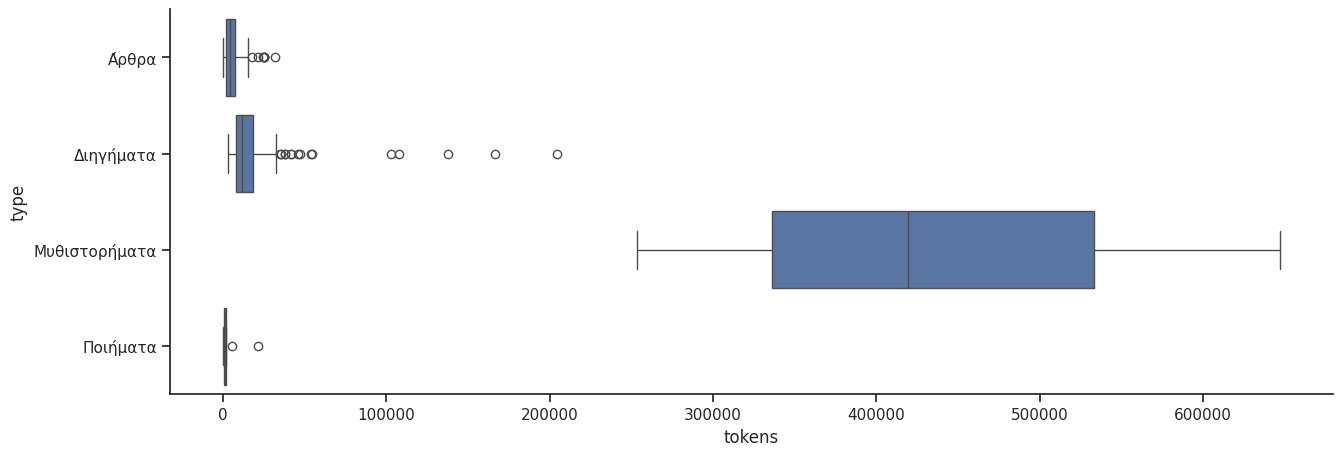

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(data=texts_df, x='tokens', y='type');
sns.despine()

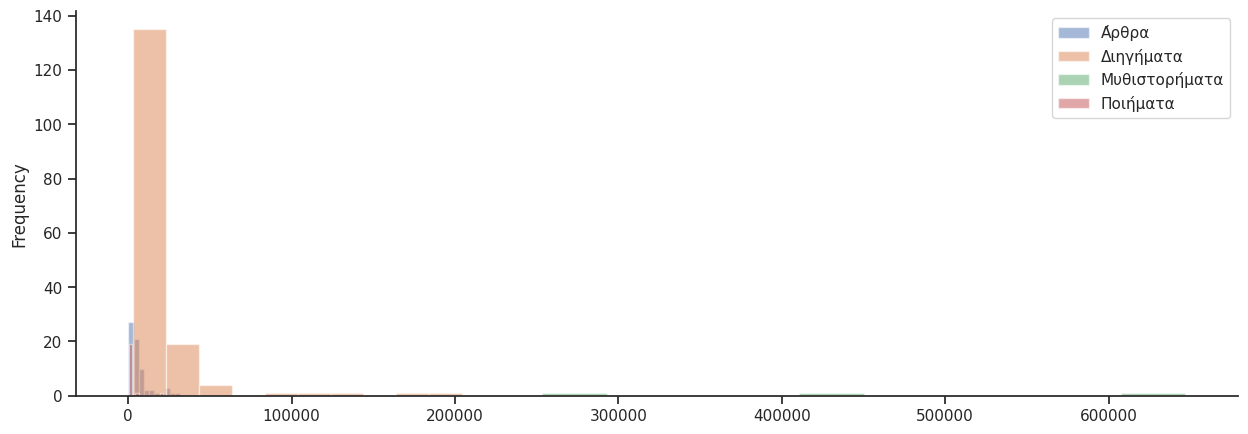

In [11]:
plt.figure(figsize=(15,5))
texts_df.groupby('type').tokens.plot.hist(legend=True, alpha=0.5)
sns.despine();

## Chapters and chunks

In [12]:
documents = {}
documents = directory_to_documents(directory_path, split_chapters=True)

texts_df = pd.DataFrame()
for key in documents.keys():
    df = pd.DataFrame([doc.metadata for doc in documents[key]])
    df['Κείμενο'] = [doc.page_content for doc in documents[key]]
    df['tokens'] = df['Κείμενο'].map(num_tokens_from_string)
    df['characters'] = df['Κείμενο'].map(len)
    texts_df = pd.concat([texts_df, df])

texts_df.info()
texts_df.head()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 51.40it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 238.73it/s]
0it [00:00, ?it/s]
100%|██████████| 16/16 [00:00<00:00, 316.00it/s]


<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        256 non-null    object
 1   theme       256 non-null    object
 2   title       256 non-null    object
 3   year        256 non-null    int64 
 4   chapter     256 non-null    object
 5   Κείμενο     256 non-null    object
 6   tokens      256 non-null    int64 
 7   characters  256 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 18.0+ KB


,type,theme,title,year,chapter,Κείμενο,tokens,characters
0,Άρθρα,Διορθωτικά,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ,0,Not applied,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ\nΠαπαγεωργίου\nΣοὶ τόνδ...,421,345
1,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,Not applied,"ΟΛΙΓΑΙ ΣΗΜΕΙΩΣΕΙΣ ΕΙΣ ΤΟ ΤΡΙῼΔΙΟΝ\nἘν πρώτοις,...",3843,3434
2,Άρθρα,Διορθωτικά,ΕΚΚΛΗΣΙΑΣΤΙΚΑΙ ΕΚΔΟΣΕΙΣ ΕΝ ΑΘΗΝΑΙΣ,0,Not applied,Α´ Ὁ Διδάσκαλος καὶ τὸ «δηλαδὴ»\nἘδημοσιεύθη π...,24908,22167
3,Άρθρα,Μουσικολογικά,ΑΠΟΣΠΑΣΜΑΤΑ ΣΚΕΨΕΩΝ,0,Not applied,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια\n\nΑ´ Ἡ Μου...,7629,6757
4,Άρθρα,Μουσικολογικά,Α´ Ἡ Μουσικὴ καὶ τὰ Ἱερὰ Εὐαγγέλια,0,Not applied,...Διὰ τῆς πατροπαραδότου Ἐκκλησιαστικῆς μουσι...,3648,3300


In [13]:
from text_splitters import (text_splitter,
                            novel_splitter,
                            article_splitter,
                            short_story_splitter,
                            hymn_splitter)

splitters = {'Άρθρα' : article_splitter, 'Ποιήματα': hymn_splitter, 'Μυθιστορήματα': novel_splitter, 'Διηγήματα': short_story_splitter}

In [14]:
documents.keys()

dict_keys(['Άρθρα', 'Διηγήματα', 'Μυθιστορήματα', 'Ποιήματα'])

In [15]:
chunks = []
for type in documents.keys():
    chunks.extend(text_splitter(splitters[type], documents[type]))

In [16]:
chunks_df = pd.DataFrame([doc.metadata for doc in chunks])
chunks_df['Κείμενο'] = [doc.page_content for doc in chunks]
chunks_df['tokens'] = chunks_df['Κείμενο'].map(num_tokens_from_string)
chunks_df.info()
chunks_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6903 entries, 0 to 6902
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     6903 non-null   object
 1   theme    6903 non-null   object
 2   title    6903 non-null   object
 3   year     6903 non-null   int64 
 4   chapter  6903 non-null   object
 5   chunk    6903 non-null   int64 
 6   Κείμενο  6903 non-null   object
 7   tokens   6903 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 431.6+ KB


,type,theme,title,year,chapter,chunk,Κείμενο,tokens
0,Άρθρα,Διορθωτικά,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ,0,Not applied,0,ΔΙΟΡΘΩΣΙΣ ΕΠΙΓΡΑΜΜΑΤΟΣ\nΠαπαγεωργίου\nΣοὶ τόνδ...,420
1,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,Not applied,0,"ΟΛΙΓΑΙ ΣΗΜΕΙΩΣΕΙΣ ΕΙΣ ΤΟ ΤΡΙῼΔΙΟΝ\nἘν πρώτοις,...",581
2,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,Not applied,1,"γέγονα Κύριε. καὶ ὑποβρύχιος νοῦς. «, νομίζω ὅ...",581
3,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,Not applied,2,"Καὶ ὅμως, ἂν διεξέλθῃ τις μέχρι τέλους τὰ 18 τ...",584
4,Άρθρα,Διορθωτικά,ΕΠ᾿ ΕΥΚΑΙΡΙᾼ ΤΗΣ Μ. ΤΕΣΣΑΡΑΚΟΣΤΗΣ,0,Not applied,3,"» φέρεται «ἱερεὺς δὲ παρών, καὶ τὸ πτῶμα\nκατι...",467


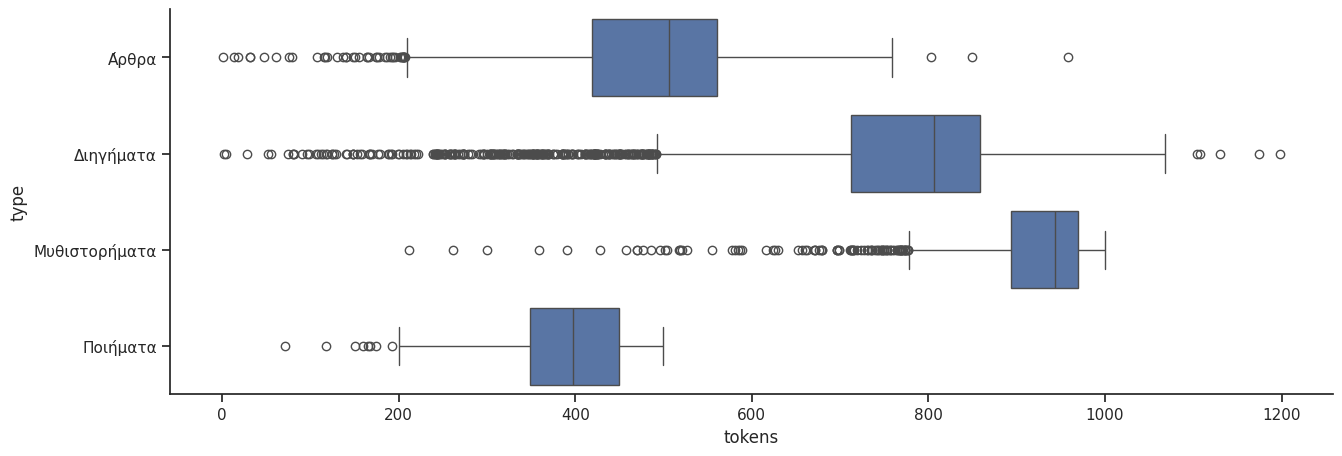

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(data=chunks_df, x='tokens', y='type');
sns.despine()

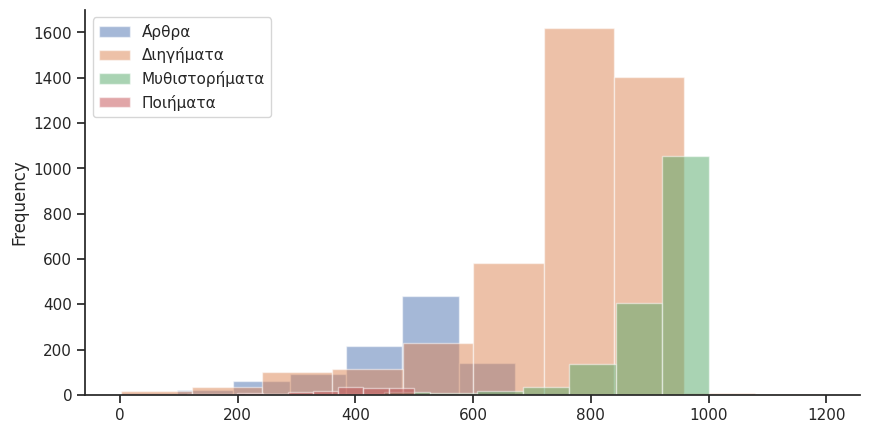

In [18]:
plt.figure(figsize=(10,5))
chunks_df.groupby('type').tokens.plot.hist(legend=True, alpha=0.5)
sns.despine();